# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

CREATING DATASET


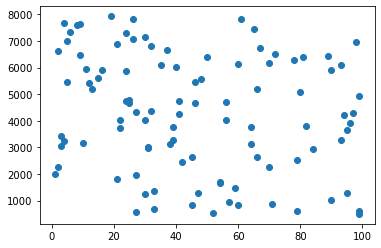

In [2]:
age = np.random.randint(1 ,100 , 100)
sal = np.random.randint(500, 8000,100)
plt.scatter(age, sal)

In [3]:
df = pd.DataFrame({"AGE" :age , "SALARY" :sal })
df

,AGE,SALARY
0,93,6096
1,40,6005
2,30,1244
3,57,943
4,9,6484
...,...,...
95,41,4265
96,35,6091
97,10,3168
98,61,7827


In [4]:
df['PURCHASED'] = 0
df

,AGE,SALARY,PURCHASED
0,93,6096,0
1,40,6005,0
2,30,1244,0
3,57,943,0
4,9,6484,0
...,...,...,...
95,41,4265,0
96,35,6091,0
97,10,3168,0
98,61,7827,0


In [5]:
df['PURCHASED'] = df.apply(lambda x: 1 if (6*x['AGE']+3*x["SALARY"]>18000)  else 0, axis=1)
print(df)


    AGE  SALARY  PURCHASED
0    93    6096          1
1    40    6005          1
2    30    1244          0
3    57     943          0
4     9    6484          1
..  ...     ...        ...
95   41    4265          0
96   35    6091          1
97   10    3168          0
98   61    7827          1
99   30    7162          1

[100 rows x 3 columns]


In [6]:
#Introduce Error
print(df)
df['AGE'] =  df['AGE'] +np.random.randint(0, 33, 100)
df['SALARY'] = df['SALARY'] +np.random.randint(-500, 1000, 100)

df        

    AGE  SALARY  PURCHASED
0    93    6096          1
1    40    6005          1
2    30    1244          0
3    57     943          0
4     9    6484          1
..  ...     ...        ...
95   41    4265          0
96   35    6091          1
97   10    3168          0
98   61    7827          1
99   30    7162          1

[100 rows x 3 columns]


,AGE,SALARY,PURCHASED
0,103,6595,1
1,61,6042,1
2,34,930,0
3,66,1461,0
4,27,7275,1
...,...,...,...
95,45,4816,0
96,54,5737,1
97,39,3406,0
98,84,7408,1



## Importing the dataset

In [7]:
df.to_csv("Record08.csv" , index = 0)

In [8]:
dataset = pd.read_csv('Record08.csv')
print(dataset)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


    AGE  SALARY  PURCHASED
0   103    6595          1
1    61    6042          1
2    34     930          0
3    66    1461          0
4    27    7275          1
..  ...     ...        ...
95   45    4816          0
96   54    5737          1
97   39    3406          0
98   84    7408          1
99   38    8029          1

[100 rows x 3 columns]


## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
print(X_train)

[[  42 7767]
 [ 108 4916]
 [  38 8029]
 [  42 6275]
 [  62 3630]
 [  65 4407]
 [  40 2863]
 [  77 3125]
 [  28 5983]
 [  49 4697]
 [  62 1643]
 [  95 6210]
 [ 116 4061]
 [  58 5139]
 [  77 2150]
 [  61 6042]
 [  75 6757]
 [  24 4379]
 [   8 2665]
 [  27 7275]
 [  36 6671]
 [ 111 1789]
 [  98 2339]
 [  28 4824]
 [  75 1447]
 [  37 5268]
 [  97 8232]
 [ 103 6595]
 [  25 2335]
 [  42 4137]
 [  30 7708]
 [ 112 6804]
 [  14 3743]
 [  46 4747]
 [  51 5430]
 [  51 8096]
 [  23 5516]
 [  90 6267]
 [  50 6930]
 [  59 1993]
 [  93 1697]
 [  73 3146]
 [  98 6300]
 [  51 4735]
 [  80 3136]
 [ 115  943]
 [  77 1413]
 [  64 7310]
 [  39 3406]
 [  84 7408]
 [  58 2639]
 [ 123 1475]
 [  10 8136]
 [  53 1378]
 [  37 1156]
 [  28 6520]
 [  72 2404]
 [ 110 1208]
 [ 125 4087]
 [  56 2481]
 [ 125 6928]
 [  57 4613]
 [  23 7149]
 [  18 2813]
 [  43 7025]
 [ 101 6454]
 [  31 7955]
 [  22 5511]
 [  66 5003]
 [  87 3861]
 [  54 5737]
 [ 112 4402]
 [  61 3097]
 [  81 4645]
 [  51 1791]]


In [11]:
print(y_train)

[1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0
 0]


In [12]:
print(X_test)

[[  61 2786]
 [  32 6539]
 [  34  930]
 [  28 1907]
 [  96 1867]
 [  31 5151]
 [  79 5935]
 [  53 6857]
 [  49 4154]
 [  45 4816]
 [  66 1299]
 [  36 1769]
 [  29 7181]
 [  46 4025]
 [  36 4307]
 [ 125 3528]
 [  93 4160]
 [  54 6281]
 [ 116 3848]
 [ 112 5018]
 [  73 6164]
 [  26 6775]
 [  66 1461]
 [ 106 5088]
 [  67 6573]]


In [13]:
print(y_test)

[0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print(X_train)

[[-0.66928446  1.47536967]
 [ 1.45440661  0.13680781]
 [-0.79799301  1.59838027]
 [-0.66928446  0.77486659]
 [-0.02574171 -0.46697702]
 [ 0.0707897  -0.10217078]
 [-0.73363873 -0.82708819]
 [ 0.45691535 -0.70407759]
 [-1.11976438  0.63777081]
 [-0.4440445   0.03398598]
 [-0.02574171 -1.39988561]
 [ 1.03610383  0.74434869]
 [ 1.71182371 -0.26461989]
 [-0.15445026  0.24150767]
 [ 0.45691535 -1.16184603]
 [-0.05791885  0.66547167]
 [ 0.39256108  1.00116852]
 [-1.24847293 -0.11531696]
 [-1.76330713 -0.92005039]
 [-1.15194152  1.24437268]
 [-0.86234728  0.960791  ]
 [ 1.55093803 -1.33133773]
 [ 1.13263524 -1.07310938]
 [-1.11976438  0.09361325]
 [ 0.39256108 -1.49190881]
 [-0.83017015  0.30207396]
 [ 1.1004581   1.69369   ]
 [ 1.29352093  0.92510854]
 [-1.2162958  -1.0749874 ]
 [-0.66928446 -0.22893743]
 [-1.05541011  1.44766881]
 [ 1.58311516  1.02323531]
 [-1.57024431 -0.41392283]
 [-0.54057591  0.05746129]
 [-0.37969022  0.37813394]
 [-0.37969022  1.62983718]
 [-1.28065007  0.41851147]
 

In [16]:
print(X_test)

[[-0.05791885 -0.86324015]
 [-0.99105583  0.8988162 ]
 [-0.92670156 -1.73464346]
 [-1.11976438 -1.27593601]
 [ 1.06828096 -1.29471625]
 [-1.02323297  0.24714175]
 [ 0.52126963  0.61523452]
 [-0.31533595  1.04811913]
 [-0.4440445  -0.22095583]
 [-0.57275305  0.08985721]
 [ 0.10296684 -1.56139571]
 [-0.86234728 -1.34072785]
 [-1.08758725  1.20023911]
 [-0.54057591 -0.28152211]
 [-0.86234728 -0.14912139]
 [ 2.00141795 -0.51486664]
 [ 0.97174955 -0.21813879]
 [-0.28315881  0.77768363]
 [ 1.71182371 -0.36462469]
 [ 1.58311516  0.18469744]
 [ 0.3282068   0.72275141]
 [-1.18411866  1.00961963]
 [ 0.10296684 -1.48533572]
 [ 1.39005234  0.21756286]
 [ 0.13514398  0.9147794 ]]


## Training the Logistic Regression model on the Training set

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

## Predicting a new result

In [18]:
print(classifier.predict(sc.transform([[100000000,108888888888899999]])))

[1]


## Predicting the Test set results

In [19]:
X_test

array([[-0.05791885, -0.86324015],
       [-0.99105583,  0.8988162 ],
       [-0.92670156, -1.73464346],
       [-1.11976438, -1.27593601],
       [ 1.06828096, -1.29471625],
       [-1.02323297,  0.24714175],
       [ 0.52126963,  0.61523452],
       [-0.31533595,  1.04811913],
       [-0.4440445 , -0.22095583],
       [-0.57275305,  0.08985721],
       [ 0.10296684, -1.56139571],
       [-0.86234728, -1.34072785],
       [-1.08758725,  1.20023911],
       [-0.54057591, -0.28152211],
       [-0.86234728, -0.14912139],
       [ 2.00141795, -0.51486664],
       [ 0.97174955, -0.21813879],
       [-0.28315881,  0.77768363],
       [ 1.71182371, -0.36462469],
       [ 1.58311516,  0.18469744],
       [ 0.3282068 ,  0.72275141],
       [-1.18411866,  1.00961963],
       [ 0.10296684, -1.48533572],
       [ 1.39005234,  0.21756286],
       [ 0.13514398,  0.9147794 ]])

In [20]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [21]:
y_pred = classifier.predict(X_test)
#print(y_pred)
#print(y_pred.shape)
#print(y_pred.reshape(25,1))
#print(y_pred.reshape(len(y_pred),1))

#print(y_test.reshape(len(y_test),1))

print("Predict Actual")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


Predict Actual
[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]]


In [22]:
print("Pred Actual")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


Pred Actual
[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]]


In [23]:
y_pred.reshape(25,1)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1]], dtype=int64)

In [24]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1], dtype=int64)

## Making the Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
#cm = confusion_matrix(y_test, y_pred)

#print(cm)
accuracy_score(y_test, y_pred)

0.92

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


In [ ]:
len(y_pred)

In [ ]:
y_pred.shape

#1 row and 25 elements

#but what we want is   # 1 column  and 25 rows in it

In [ ]:
y_pred.reshape(len(y_pred),1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize =True)

In [ ]:
accuracy_score(y_test, y_pred, normalize = False)

In [ ]:
len(y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
obj  = RandomForestClassifier()
obj.fit(X_train, y_train)

In [ ]:
y_pred = obj.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
Train any algo

1. import the lib
2. create the object 
3. .fit() on training dataset
4. .predict() on test dataset